# Diagrama de fase del comportamiento de $P_0$ y $\langle n \rangle$ en función de $\nu$, $N$ y $\alpha$

Dado que la ecuación maestra reproduce de manera satisfactoria la distribución de probabilidad discreta en el estado estacionario $P_n$, que resulta de una larga evolución del sistema, haremos un análisis utilizando la ecuación maestra. En particular nos perderemos de mucha estadística que no está presente en el estado estacionario, pero nos permitirá obtener relaciones entre parámetros de interés.

## Dependencia de $P_0$ en función de $\nu$

Es de interés el valor de $P_0$ en el estado estacionario dado que es la probabilidad de que, dado que se observa el sistema, la población esté extinta. Dicho valor es el primer elemento del vector normalizado del núcleo de la matriz $\overline{\overline{M}}$ definida como

$$M_{i, j} = -\left[ -\alpha (N-i) + \nu i \frac{N-i}{N-1} \mu i \right]\delta_{i, j} + \left[ \alpha (N-i+1) + \nu (i-1)\frac{N-i+1}{N-1} \right] \delta_{i, j+1} + \mu (i+1) \delta_{i, j-1},$$

tal como se definió en el archivo `2-MasterEquation.ipynb`. En la librería `MasterEquation` ubicada en el directorio `librerías\MasterEquation.py` se encuentra implementada dicha diagonalización para hallar el espacio nulo y en particular $P_0(\nu)$ 

### Código

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from librerias.masterEquation import P0vsNu
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
# Parameters
N = 20
mu, alpha = 1, 0.01
nu_min, nu_max, N_nu = 0, 4, 1000
r = 0.5

In [5]:
# model
me = P0vsNu(N, nu_min, nu_max, N_nu, mu, alpha)
me.makeP0vsNu()
nuCar = me.getCaracteristicNu(r)
nuCar

1.2732732732732732

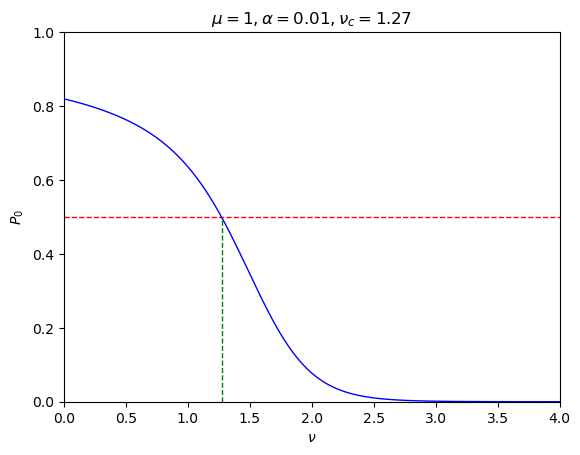

In [6]:
plt.hlines(0.5, nu_min, nu_max, color = "red", lw=1, linestyle="--")
plt.plot(me.getnuVector(), me.getP0Vector(), color = "blue", lw=1)
plt.vlines(nuCar, 0, r, color = "green", lw=1, linestyle="--")
plt.axis([0, nu_max, 0, 1])
plt.xlabel(r"$\nu$")
plt.ylabel(r"$P_0$")
plt.title(r"$\mu = 1, \alpha = 0.01, \nu_{c} = %.2f$"%nuCar)

plt.show()

## Dependecia de $P_0$ y $\langle n \rangle$ en función de $\nu$ y $N$, para $\alpha$ fijo.

De la misma manera que hicimos en la sección anterior, queremos ahora variar el valor de $N$ y mirar los perfiles que resultan.

### Código

In [7]:
import pickle
import os

In [54]:
# Define the folder and file path
folder_name = 'data\\EcuacionMaestra'
filename = os.path.join(folder_name, 'simulation_nu_and_N.pkl')

# Load the data from the pickle file
with open(filename, 'rb') as f:
    data = pickle.load(f)

# Access the loaded data
label_data = data['label_data']
total_data_N = data['total_data_N']

# Access fixed parameters
fixed_parameters = data['fixed_parameters']
alphas = fixed_parameters['alphas']
mu = fixed_parameters['mu']
N_min = fixed_parameters['N_min']
N_max = fixed_parameters['N_max']
nu_min = fixed_parameters['nu_min']
nu_max = fixed_parameters['nu_max']
N_nu = fixed_parameters['N_nu']
r = fixed_parameters['r']

# Example: Print loaded fixed parameters
print("Loaded fixed parameters:")
print(f"alphas: {alphas}")
print(f"mu: {mu}")
print(f"N_min: {N_min}, N_max: {N_max}")
print(f"nu_min: {nu_min}, nu_max: {nu_max}")
print(f"N_nu: {N_nu}")
print(f"r: {r}")

Loaded fixed parameters:
alphas: [0.1, 0.01, 0.001, 0.0001]
mu: 1
N_min: 5, N_max: 100
nu_min: 0, nu_max: 4
N_nu: 1000
r: 0.5


In [9]:
def get_idx_from_label(lb, labels):
    for idx, label in enumerate(labels):
        if label == lb:
            return idx
    return None

Gráficas de $P_0$

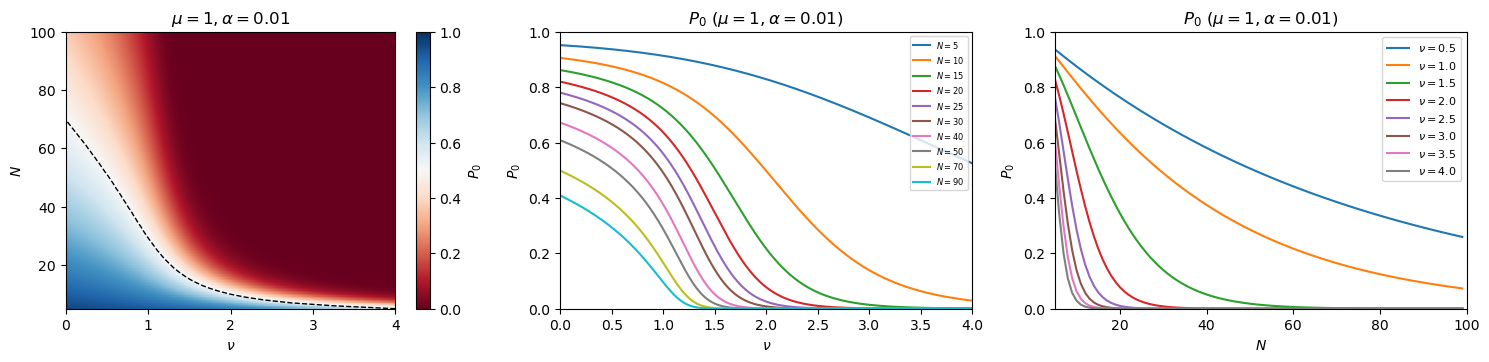

In [11]:
alpha_plot = 0.01
idx_alpha = get_idx_from_label(0.01, alphas)
idx_label_plot = get_idx_from_label('P0s', label_data)
idx_nu_car = get_idx_from_label('nuCars', label_data)



if idx_label_plot is not None and idx_alpha is not None:
    # plot the map
    fig = plt.figure(figsize=(15, 10))

    plt.subplot(331)

    plt.imshow(total_data_N[idx_alpha][idx_label_plot], aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$P_0$")
    plt.plot(total_data_N[idx_alpha][idx_nu_car], range(N_min, N_max), color="black", lw=1, linestyle="--")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.title(r"$\mu = 1, \alpha = $" + str(alpha_plot))

    plt.subplot(332)


    N_min, N_max = 5, 100
    nu_min, nu_max, N_nu = 0, 4, 1000
    N_cuts = [5, 10, 15, 20, 25, 30, 40, 50, 70, 90]
    for N_cut in N_cuts:
        plt.plot(np.linspace(nu_min, nu_max, N_nu), total_data_N[idx_alpha][idx_label_plot][N_cut - N_min], label=r"$N = %d$"%N_cut)

    plt.legend(fontsize = 6)
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$P_0$")
    plt.title(r"$P_0~(\mu = 1, \alpha = " + str(alpha_plot) + ")$")
    plt.axis([nu_min, nu_max, 0, 1])

    plt.subplot(333)

    nus = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
    def find_idx_nu(nu, array):
        idx = (np.abs(array - nu)).argmin()
        return idx

    for nu in nus:
        idx = find_idx_nu(nu, np.linspace(nu_min, nu_max, N_nu))
        plt.plot(range(N_min, N_max), total_data_N[idx_alpha][idx_label_plot][:, idx], label=r"$\nu = %.1f$"%nu)
        plt.xlabel(r"$N$")  
        plt.ylabel(r"$P_0$")
        plt.title(r"$P_0~(\mu = 1, \alpha = $" + str(alpha_plot) + ")")
        plt.legend(fontsize=8)
    plt.axis([N_min, N_max, 0, 1])

    plt.tight_layout()

    plt.show()

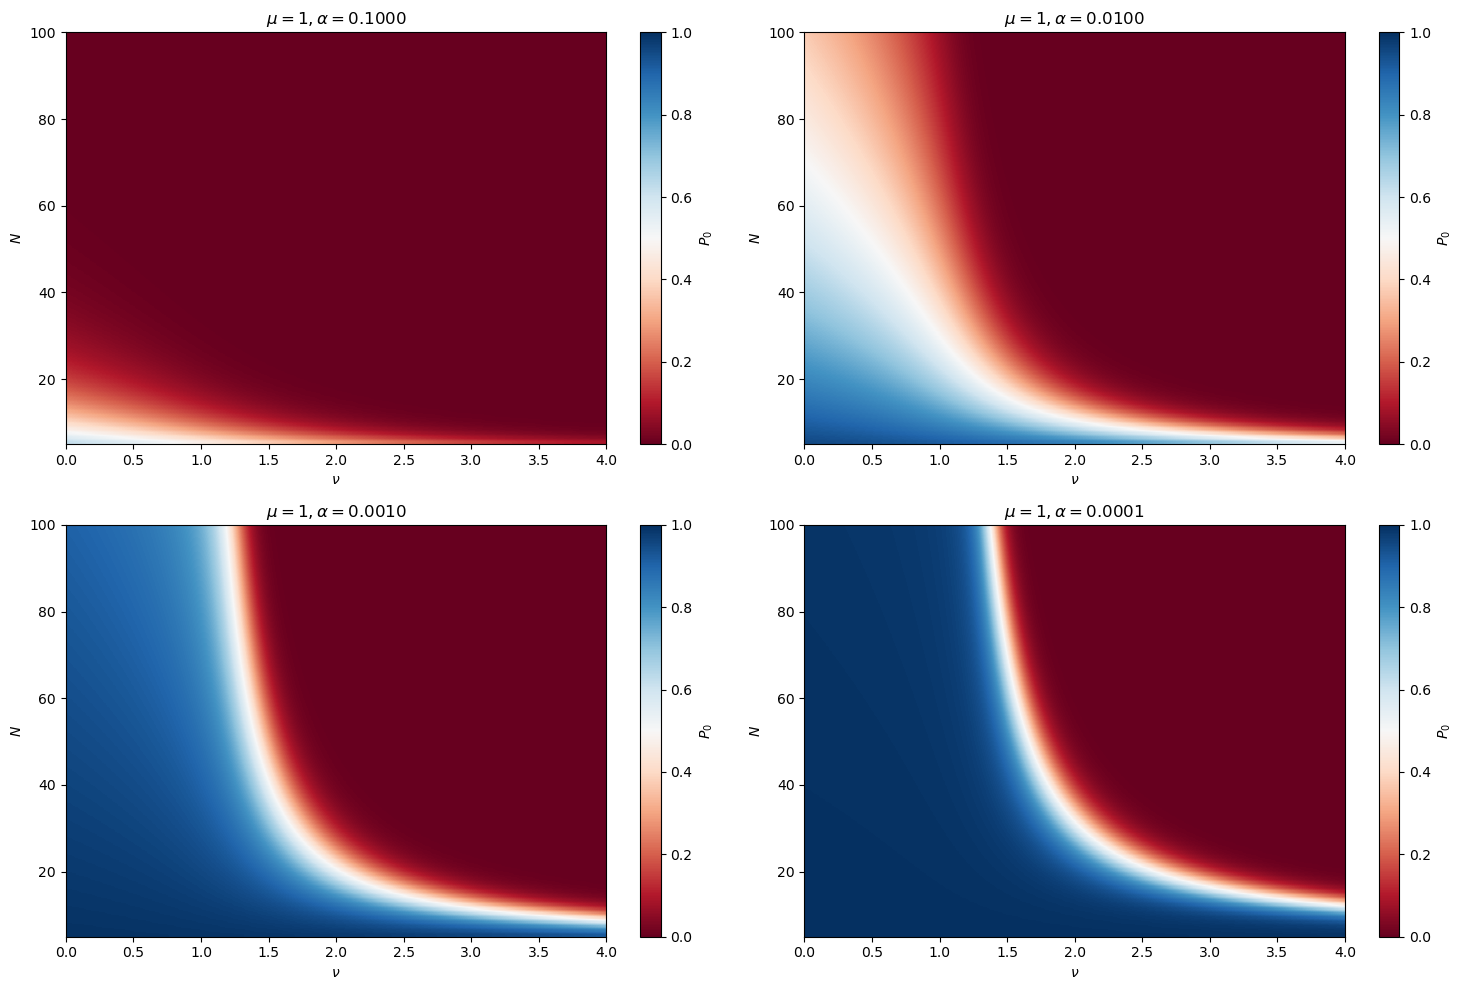

In [12]:
# plot the map
fig = plt.figure(figsize=(15, 10))
for i, data in enumerate(total_data_N):
    P0s = data[get_idx_from_label('P0s', label_data)]
    plt.subplot(2, 2, i+1)
    plt.imshow(P0s, aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$P_0$")
    #plt.plot(nuCars, range(N_min, N_max), color="black", lw=1, linestyle="--")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.title(r"$\mu = 1, \alpha = %.4f$"%alphas[i])

plt.tight_layout()

plt.show()

Comparacion de las curvas $\nu_v$

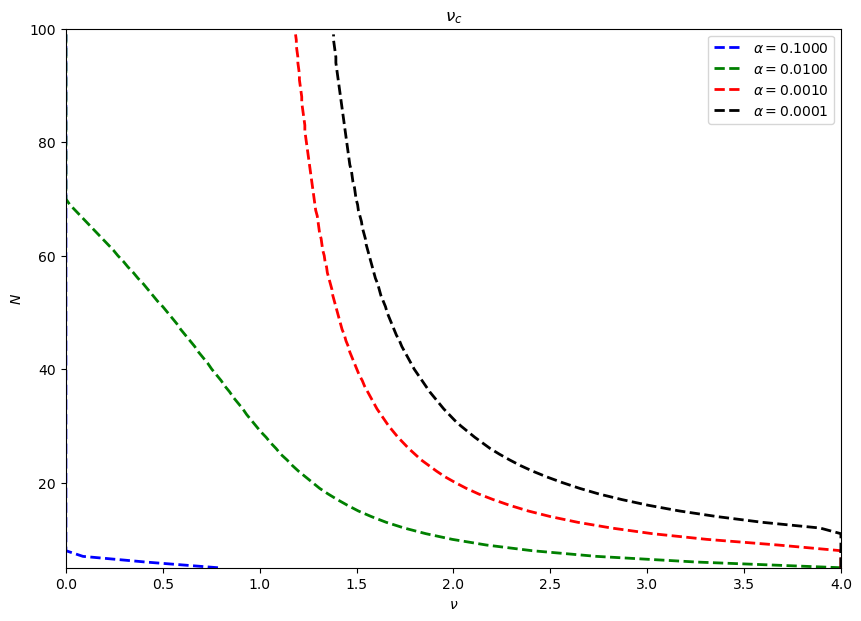

In [13]:
fig = plt.figure(figsize=(10, 7))
colors = ["blue", "green", "red", "black"]
for i, data in enumerate(total_data_N):
    plt.plot(data[get_idx_from_label('nuCars', label_data)], range(N_min, N_max), color=colors[i], lw=2, linestyle="--", label=r"$\alpha = %.4f$"%alphas[i])
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.title(r"$\nu_{c}$")
    plt.xlim([nu_min, nu_max])
    plt.ylim([N_min, N_max])
    plt.legend()

plt.show()

Gráficas de $\langle n \rangle$

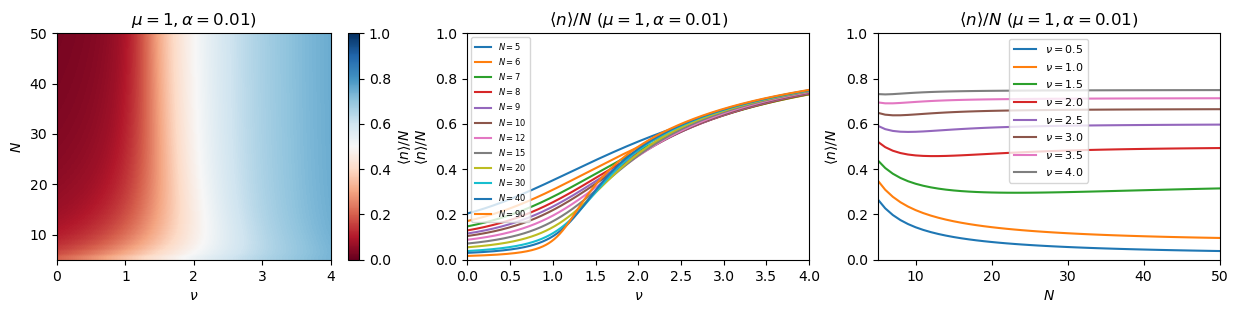

In [14]:
alpha_plot = 0.01
idx_alpha = get_idx_from_label(alpha_plot, alphas)
idx_label_plot = get_idx_from_label('Means', label_data)

if idx_label_plot is not None and idx_alpha is not None:
    # plot the map
    fig = plt.figure(figsize=(15, 10))

    plt.subplot(331)

    plt.imshow(total_data_N[idx_alpha][idx_label_plot], aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$\langle n \rangle / N$")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.title(r"$\mu = 1, \alpha = $" + str(alpha_plot) + ")")
    plt.ylim([N_min, 50])

    plt.subplot(332)

    N_cuts = [5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 90]
    N_min, N_max = 5, 100
    nu_min, nu_max, N_nu = 0, 4, 1000
    for N_cut in N_cuts:
        plt.plot(np.linspace(nu_min, nu_max, N_nu), total_data_N[idx_alpha][idx_label_plot][N_cut - N_min], label=r"$N = %d$"%N_cut)

    plt.legend(fontsize=6)
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\langle n \rangle / N $")
    plt.ylim([0, 1])
    plt.xlim([nu_min, nu_max])
    plt.title(r"$\langle n \rangle / N ~(\mu = 1, \alpha = 0.01)$")


    plt.subplot(333)

    nus = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
    def find_idx_nu(nu, array):
        idx = (np.abs(array - nu)).argmin()
        return idx

    for nu in nus:
        idx = find_idx_nu(nu, np.linspace(nu_min, nu_max, N_nu))
        plt.plot(range(N_min, N_max), total_data_N[idx_alpha][idx_label_plot][:, idx], label=r"$\nu = %.1f$"%nu)
        plt.xlabel(r"$N$")
        plt.ylabel(r"$\langle n \rangle / N$")
        plt.title(r"$\langle n \rangle / N ~(\mu = 1, \alpha = 0.01)$")
        plt.legend(fontsize = 8)

    plt.xlim([N_min, 50])
    plt.ylim([0, 1])

    plt.show()

In [15]:
print(label_data)

['P0s', 'Means', 'RealMeans', 'Std', 'RealStd', 'nuCars']


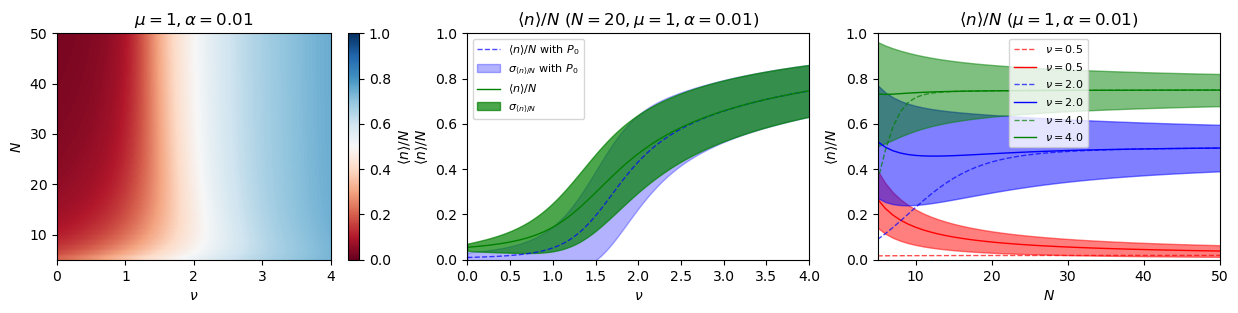

In [43]:
idx_alpha = get_idx_from_label(0.01, alphas)
idx_mean_without_P0 = get_idx_from_label('Means', label_data)
idx_mean_with_P0 = get_idx_from_label('RealMeans', label_data)
idx_std_without_P0 = get_idx_from_label('Std', label_data)
idx_std_with_P0 = get_idx_from_label('RealStd', label_data)


if idx_mean_without_P0 is not None and idx_mean_with_P0 is not None and idx_std_without_P0 is not None and idx_std_with_P0 is not None:
    # plot the map
    fig = plt.figure(figsize=(15, 10))

    plt.subplot(331)

    plt.imshow(total_data_N[idx_alpha][idx_mean_without_P0], aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$\langle n \rangle / N$")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.title(r"$\mu = 1, \alpha = 0.01$")
    plt.ylim([N_min, 50])

    plt.subplot(332)

    N_cut = 20
    N_min, N_max = 5, 100
    nu_min, nu_max, N_nu = 0, 4, 1000
    
    mean_vector_P0 = total_data_N[idx_alpha][idx_mean_with_P0][N_cut - N_min]
    std_vector_P0 = total_data_N[idx_alpha][idx_std_with_P0][N_cut - N_min]
    plt.plot(np.linspace(nu_min, nu_max, N_nu), mean_vector_P0, color = "blue", lw=1, linestyle="--", alpha = 0.7, label = r"$\langle n \rangle / N $ with $P_0$")
    plt.fill_between(np.linspace(nu_min, nu_max, N_nu), mean_vector_P0 - std_vector_P0, mean_vector_P0 + std_vector_P0, color="blue", alpha=0.3, label = r"$\sigma_{\langle n \rangle / N}$ with $P_0$")

    mean_vector = total_data_N[idx_alpha][idx_mean_without_P0][N_cut - N_min]
    std_vector = total_data_N[idx_alpha][idx_std_without_P0][N_cut - N_min]
    plt.plot(np.linspace(nu_min, nu_max, N_nu), mean_vector, color = "green", lw=1, linestyle="-", label = r"$\langle n \rangle / N$")
    plt.fill_between(np.linspace(nu_min, nu_max, N_nu), mean_vector - std_vector , mean_vector + std_vector, color="green", alpha=0.7, label = r"$\sigma_{\langle n \rangle / N}$")

    plt.legend(fontsize=8)
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\langle n \rangle / N $")
    plt.ylim([0, 1])
    plt.xlim([nu_min, nu_max])
    plt.title(r"$\langle n \rangle / N ~(N = 20, \mu = 1, \alpha = 0.01)$")
    plt.axis([nu_min, nu_max, 0, 1])

    plt.subplot(333)

    nus = [0.5, 2, 4]
    def find_idx_nu(nu, array):
        idx = (np.abs(array - nu)).argmin()
        return idx

    colors = ["red", "blue", "green"]
    for i, nu in enumerate(nus):
        idx = find_idx_nu(nu, np.linspace(nu_min, nu_max, N_nu))
        plt.plot(range(N_min, N_max), total_data_N[idx_alpha][idx_mean_with_P0][:, idx], label=r"$\nu = %.1f$"%nu, color = colors[i], linestyle="--", alpha = 0.7, lw =1)
        plt.plot(range(N_min, N_max), total_data_N[idx_alpha][idx_mean_without_P0][:, idx], label=r"$\nu = %.1f$"%nu, color = colors[i], linestyle="-", lw =1)
        plt.fill_between(range(N_min, N_max), total_data_N[idx_alpha][idx_mean_without_P0][:, idx] - total_data_N[idx_alpha][idx_std_without_P0][:, idx], total_data_N[idx_alpha][idx_mean_without_P0][:, idx] + total_data_N[idx_alpha][idx_std_without_P0][:, idx], color=colors[i], alpha=0.5)

        plt.xlabel(r"$N$")
        plt.ylabel(r"$\langle n \rangle / N$")
        plt.title(r"$\langle n \rangle / N ~(\mu = 1, \alpha = 0.01)$")
        plt.legend(fontsize = 8)

    plt.xlim([N_min, 50])
    plt.ylim([0, 1])

    plt.show()

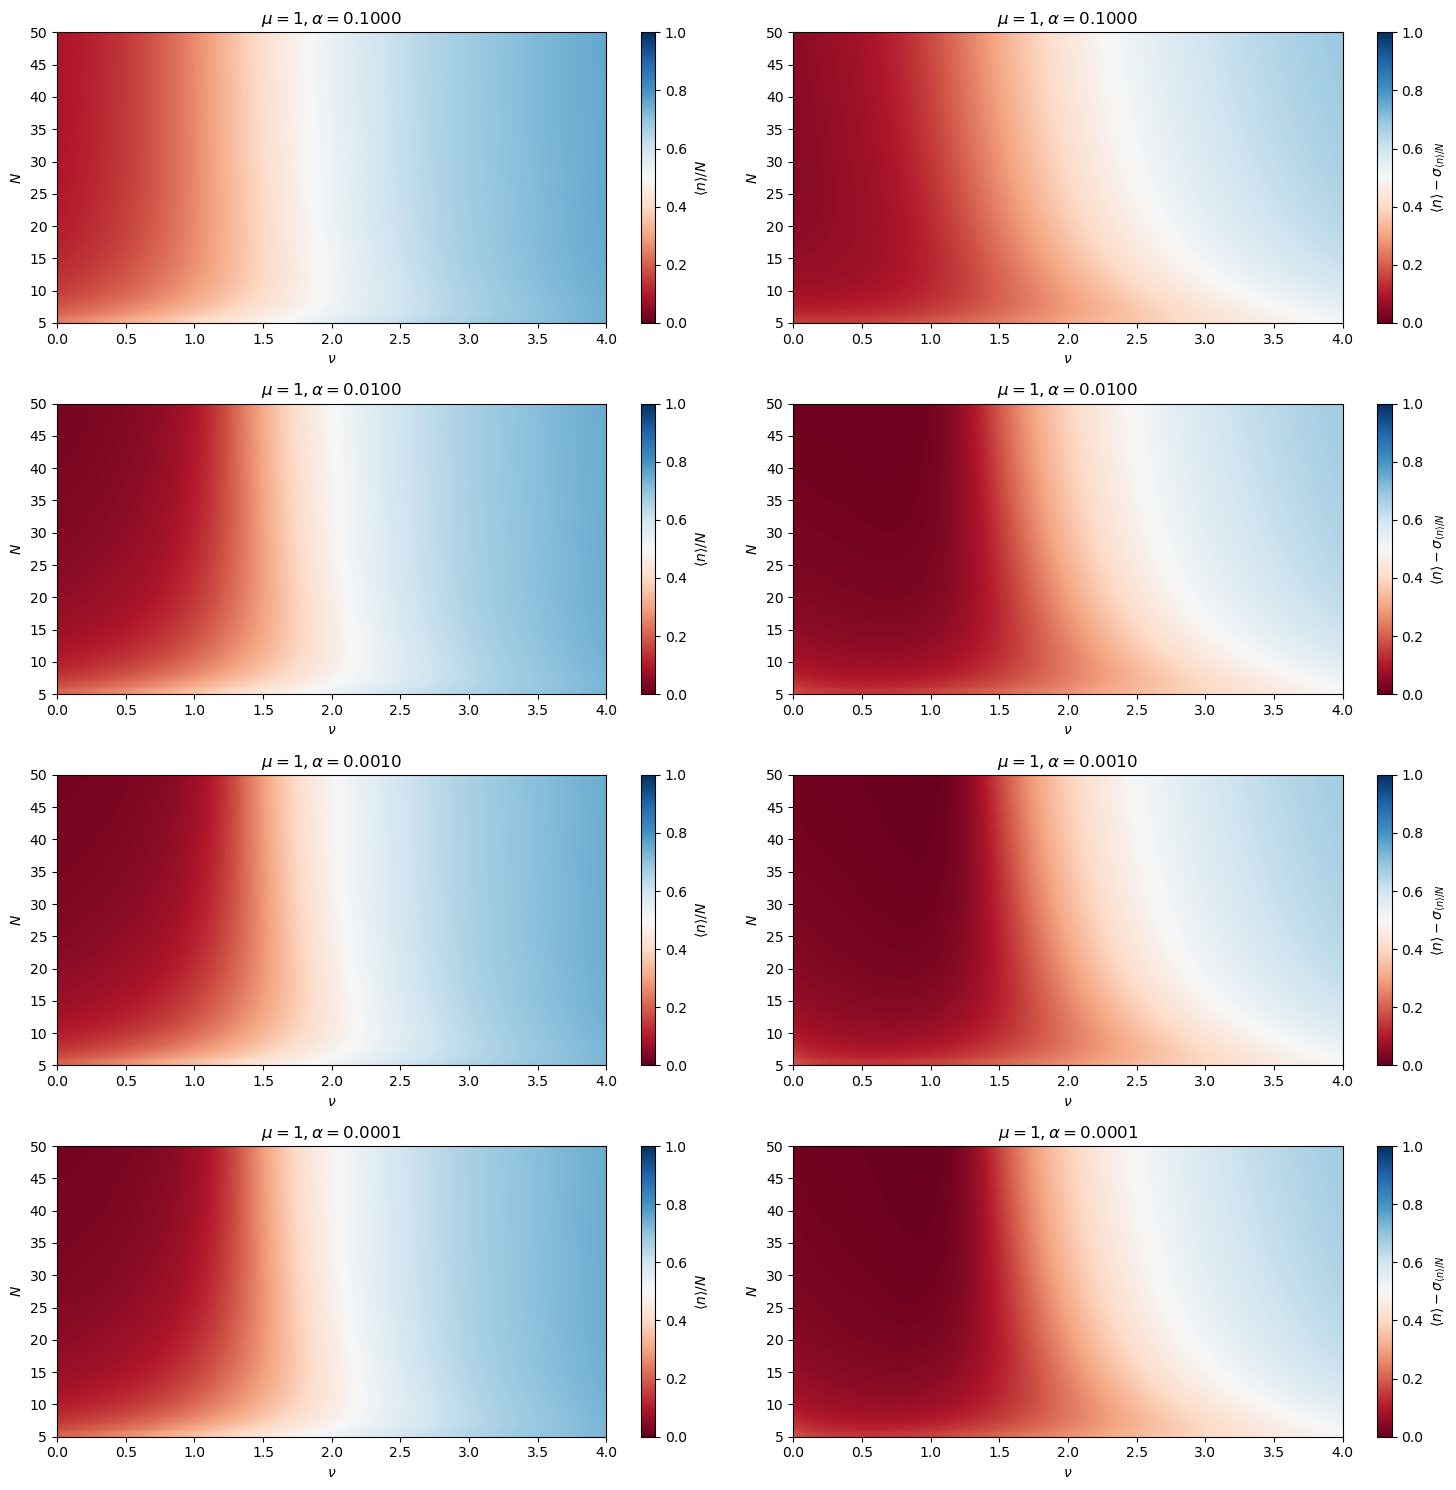

In [44]:
# plot the map
idx_mean_without_P0 = get_idx_from_label('Means', label_data)
idx_mean_with_P0 = get_idx_from_label('RealMeans', label_data)
idx_std_without_P0 = get_idx_from_label('Std', label_data)
idx_std_with_P0 = get_idx_from_label('RealStd', label_data)

fig = plt.figure(figsize=(15, 15))
for i in range(len(total_data_N)):
    plt.subplot(4, 2, 2*i+1)
    
    Means = total_data_N[i][idx_mean_without_P0]
    plt.imshow(Means, aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$\langle n \rangle  / N $")

    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.ylim([N_min, 50])
    plt.title(r"$\mu = 1, \alpha = %.4f$"%alphas[i])

    plt.subplot(4, 2, 2*i+2)

    Std = total_data_N[i][idx_std_without_P0]
    plt.imshow(Means - Std, aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$\langle n \rangle - \sigma_{\langle n \rangle / N}$")

    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.ylim([N_min, 50])
    plt.title(r"$\mu = 1, \alpha = %.4f$"%alphas[i])

plt.tight_layout()

plt.show()

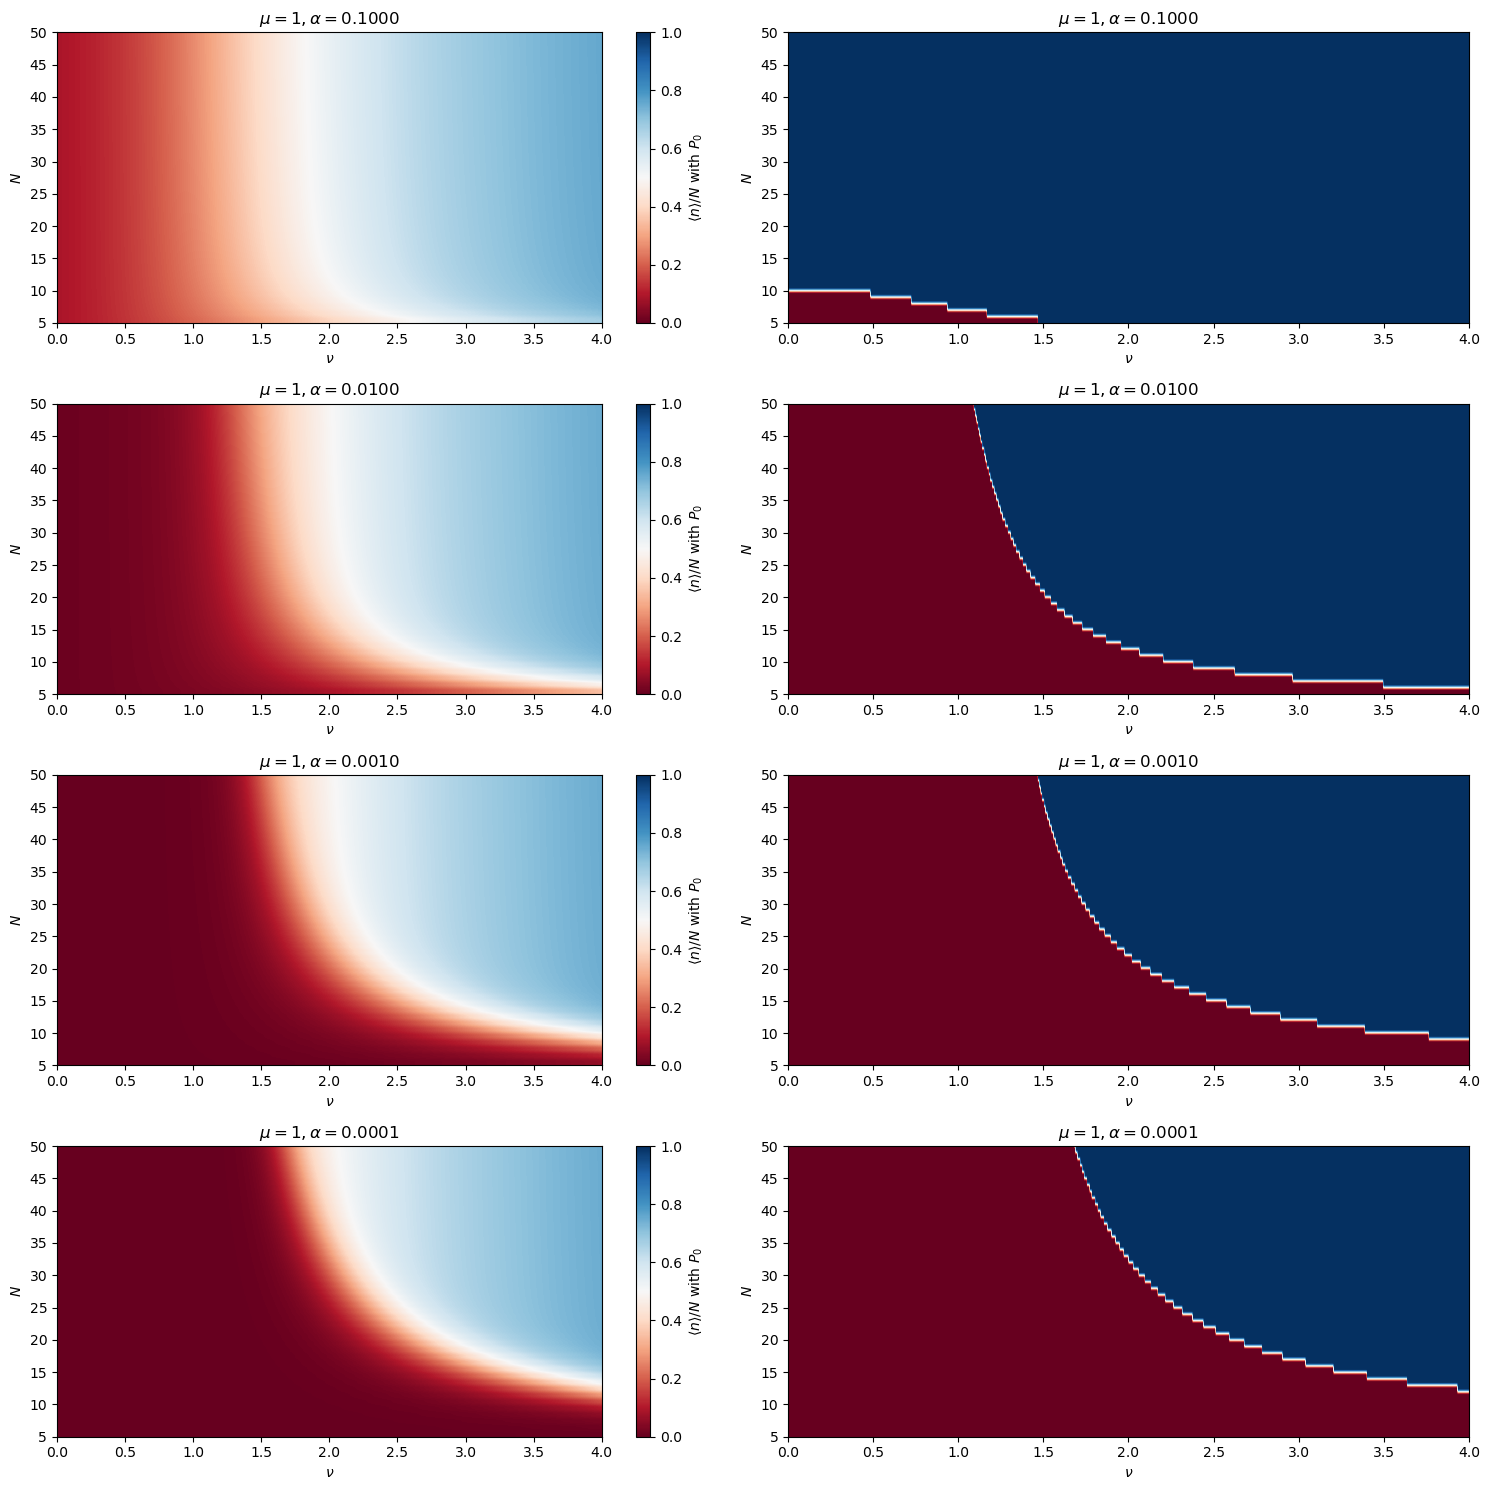

In [50]:
# plot the map
idx_mean_without_P0 = get_idx_from_label('Means', label_data)
idx_mean_with_P0 = get_idx_from_label('RealMeans', label_data)
idx_std_without_P0 = get_idx_from_label('Std', label_data)
idx_std_with_P0 = get_idx_from_label('RealStd', label_data)

fig = plt.figure(figsize=(15, 15))
for i in range(len(total_data_N)):
    plt.subplot(4, 2, 2*i+1)
    
    Means = total_data_N[i][idx_mean_with_P0]
    plt.imshow(Means, aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$\langle n \rangle  / N $ with $P_0$")

    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.ylim([N_min, 50])
    plt.title(r"$\mu = 1, \alpha = %.4f$"%alphas[i])

    plt.subplot(4, 2, 2*i+2)

    Std = total_data_N[i][idx_std_with_P0]
    aux = 1-(Means - Std < 0)
    plt.imshow(aux, aspect="auto", extent=[nu_min, nu_max, N_min, N_max], origin="lower", cmap="RdBu", vmin=0, vmax=1)
    #plt.colorbar(label=r"$\langle n \rangle - \sigma_{\langle n \rangle / N}$")

    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$N$")
    plt.ylim([N_min, 50])
    plt.title(r"$\mu = 1, \alpha = %.4f$"%alphas[i])

plt.tight_layout()

plt.show()

## Dependecia de $P_0$ en función de $\nu$ y $\alpha$, para $N$ fijo.

Vamos a proceder de la misma manera que antes, pero actualizar los valores de $\alpha$, esta vez para un $N = 20$.

In [51]:
import pickle
import os

In [56]:
# Load data

# Define the folder and file path
folder_name = 'data\\EcuacionMaestra'
filename = os.path.join(folder_name, 'simulation_nu_and_alpha.pkl')

# Load the data from the pickle file
with open(filename, 'rb') as f:
    data = pickle.load(f)

# Access the loaded data
total_data_alpha = data['total_data_alpha']
label_data = data['label_data']

# Access fixed parameters
fixed_parameters = data['fixed_parameters']
Ns = fixed_parameters['Ns']
mu = fixed_parameters['mu']
nu_min = fixed_parameters['nu_min']
nu_max = fixed_parameters['nu_max']
N_nu = fixed_parameters['N_nu']
alpha_min = fixed_parameters['alpha_min']
alpha_max = fixed_parameters['alpha_max']
N_alpha = fixed_parameters['N_alpha']
r = fixed_parameters['r']

# Example: Print loaded fixed parameters
print("Loaded fixed parameters:")
print(f"Ns: {Ns}")
print(f"mu: {mu}")
print(f"alpha_min: {alpha_min}, alpha_max: {alpha_max}")
print(f"nu_min: {nu_min}, nu_max: {nu_max}")
print(f"N_nu: {N_nu}")
print(f"r: {r}")

Loaded fixed parameters:
Ns: [5, 10, 20, 50]
mu: 1
alpha_min: -10, alpha_max: -1
nu_min: 0, nu_max: 4
N_nu: 500
r: 0.5


Gráficas $P_0$

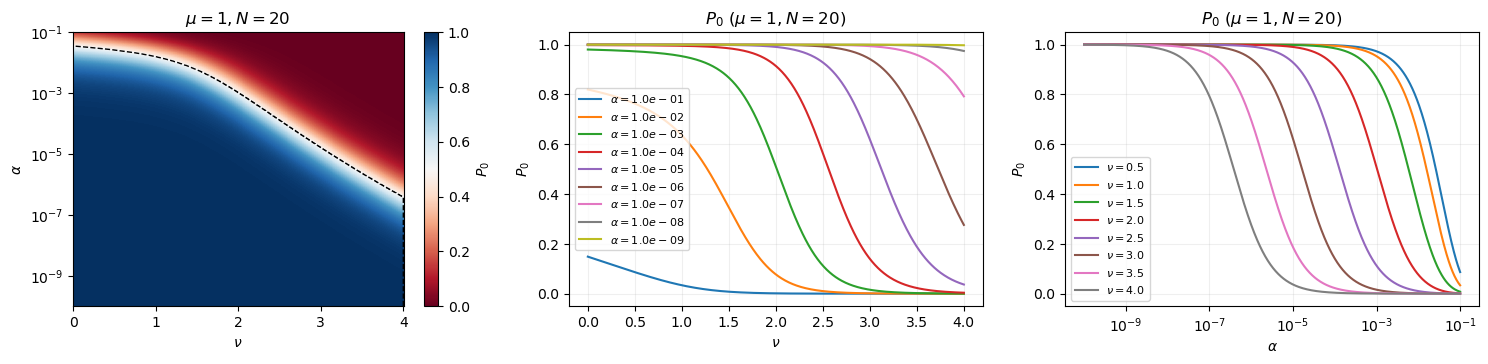

In [63]:
N_plot = 20
idx_N = get_idx_from_label(N_plot, Ns)
idx_label_plot = get_idx_from_label('P0s', label_data)
idx_nu_car = get_idx_from_label('nuCars', label_data)

alphas = np.logspace(alpha_min, alpha_max, N_alpha)

# plot the map
fig = plt.figure(figsize=(15, 10))

plt.subplot(331)

plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, total_data_alpha[idx_N][idx_label_plot], cmap="RdBu", vmin=0, vmax=1, shading='auto')
plt.colorbar(label=r"$P_0$")
plt.plot(total_data_alpha[idx_N][idx_nu_car], alphas, color="black", lw=1, linestyle="--")
plt.yscale("log")
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\alpha$")
plt.title(r"$\mu = 1, N = 20$")

plt.subplot(332)

alphas_cuts = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

for alpha_cut in alphas_cuts:
    idx = find_nearest(alphas, alpha_cut)
    plt.plot(np.linspace(nu_min, nu_max, N_nu), total_data_alpha[idx_N][idx_label_plot][idx], label=r"$\alpha = %.1e$"%alpha_cut)
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$P_0$")
    plt.title(r"$P_0~(\mu = 1, N = 20)$")
    plt.legend(fontsize = 8)

plt.grid(alpha = 0.2)


plt.subplot(333)

nus = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
def find_idx_nu(nu, array):
    idx = (np.abs(array - nu)).argmin()
    return idx

for nu in nus:
    idx = find_idx_nu(np.linspace(nu_min, nu_max, N_nu), nu)
    plt.plot(alphas, total_data_alpha[idx_N][idx_label_plot][:, idx], label=r"$\nu = %.1f$"%nu)
    plt.xlabel(r"$\alpha$")
    plt.xscale("log")
    plt.ylabel(r"$P_0$")
    plt.title(r"$P_0~(\mu = 1, N = 20)$")
    plt.legend(fontsize = 8)

plt.grid(alpha = 0.2)

plt.tight_layout()

plt.show()

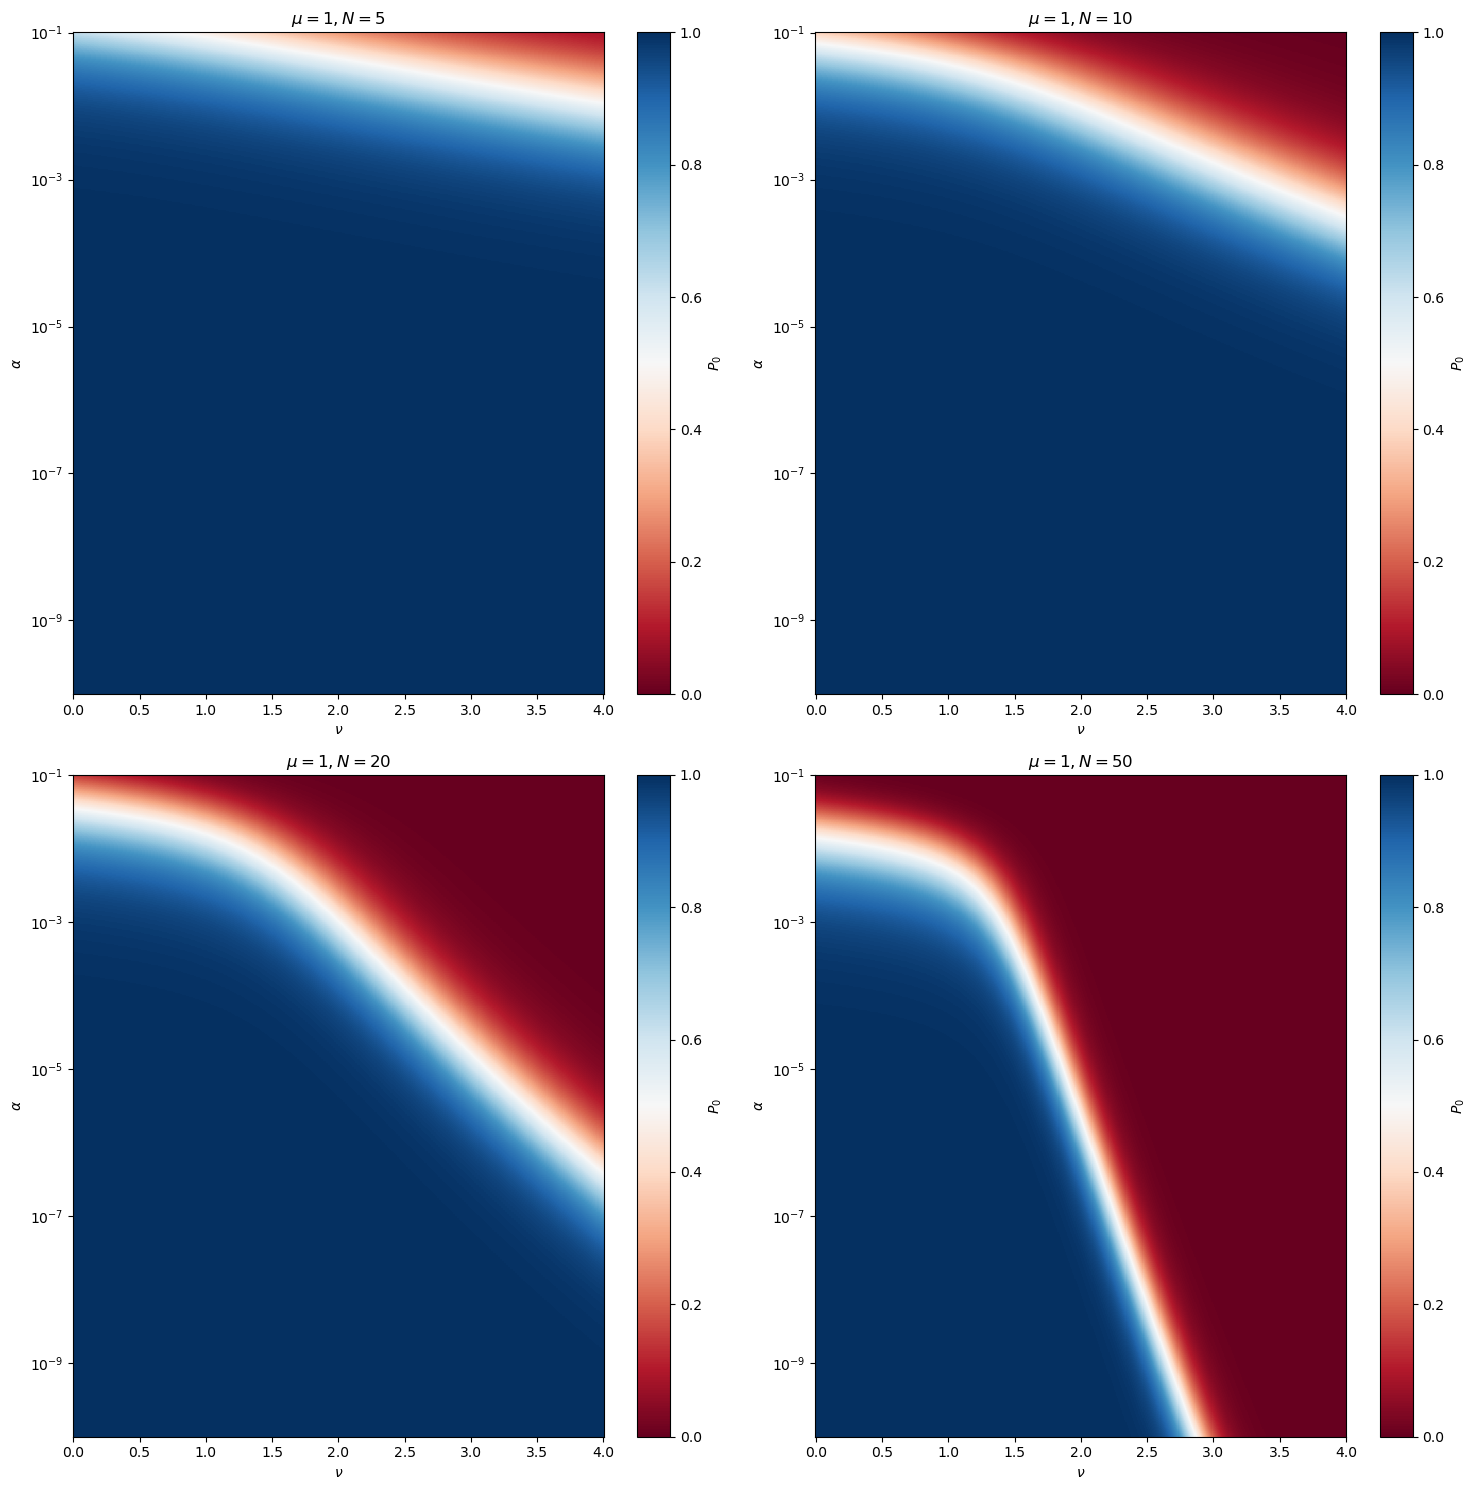

In [64]:
# plot the map
fig = plt.figure(figsize=(15, 15))
for i, data in enumerate(total_data_alpha):
    P0s = data[get_idx_from_label('P0s', label_data)]
    plt.subplot(2, 2, i+1)
    plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, P0s, cmap="RdBu", vmin=0, vmax=1, shading='auto')
    plt.colorbar(label=r"$P_0$")
    #plt.plot(nuCars, alphas, color="black", lw=1, linestyle="--")
    plt.yscale("log")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha$")
    plt.title(r"$\mu = 1, N = %d$"%Ns[i])

plt.tight_layout()

plt.show()

Comparacion de los $\nu_c$

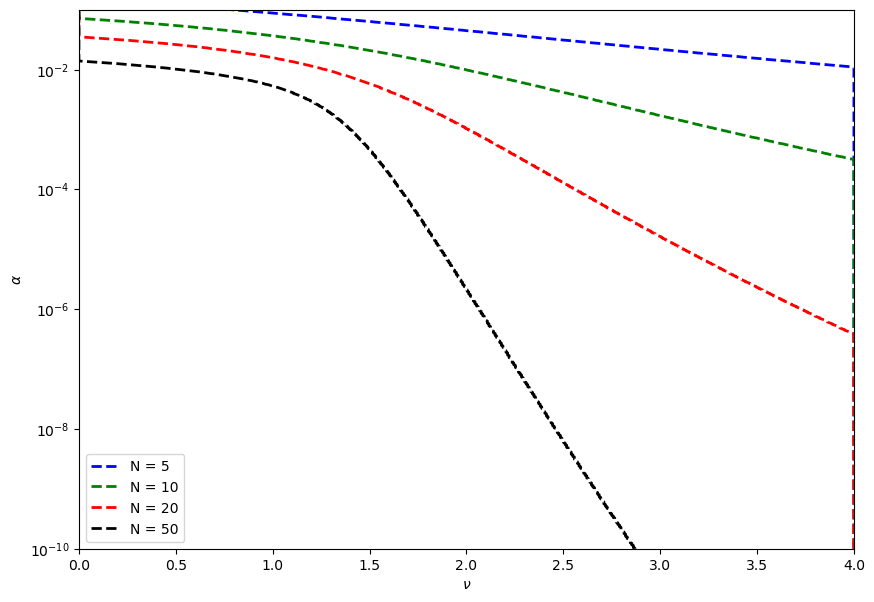

In [67]:
fig = plt.figure(figsize=(10, 7))
colors = ["blue", "green", "red", "black"]
for i, data in enumerate(total_data_alpha):
    nuCars = data[get_idx_from_label('nuCars', label_data)]
    plt.plot(nuCars, alphas, color=colors[i], lw=2, linestyle="--", label=r"N = " + str(Ns[i]))
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha$")
    plt.yscale("log")
    plt.ylim([10**alpha_min, 10**alpha_max])
    plt.xlim([nu_min, nu_max])
    plt.legend()

plt.show()

Gráficas de $\langle n \rangle$ 

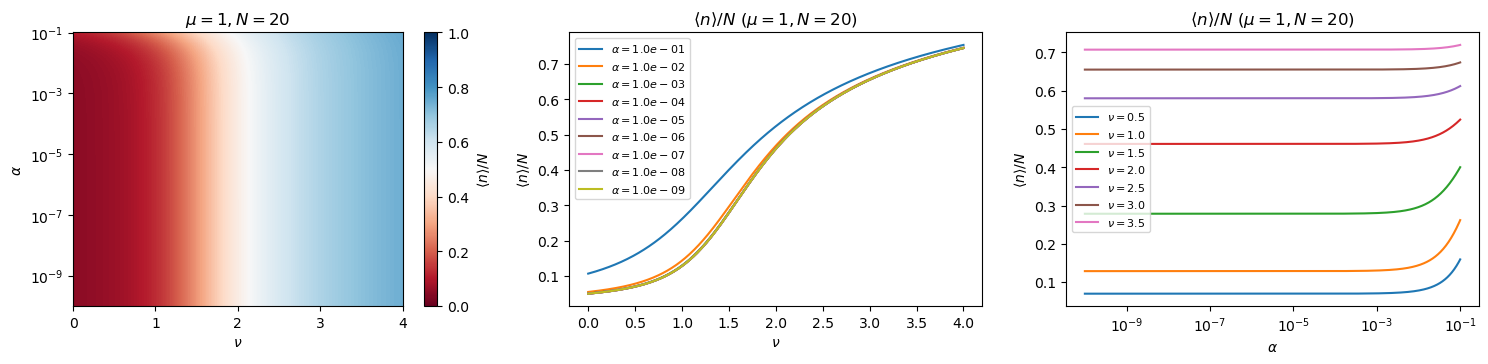

In [70]:
idx_N = get_idx_from_label(N_plot, Ns)
idx_label_plot = get_idx_from_label('Means', label_data)
idx_nu_car = get_idx_from_label('nuCars', label_data)

alphas = np.logspace(alpha_min, alpha_max, N_alpha)

fig = plt.figure(figsize=(15, 10))

nu_min, nu_max, N_nu = 0, 4, 500
alpha_min, alpha_max, N_alpha = -10, -1, 1000    # alpha = 10**alpha
alphas = np.logspace(alpha_min, alpha_max, N_alpha)

#tres subplots
plt.subplot(331)

plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, total_data_alpha[idx_N][idx_label_plot], cmap="RdBu", vmin=0, vmax=1, shading='auto')
plt.colorbar(label=r"$\langle n \rangle /N$")
plt.yscale("log")
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\alpha$")
plt.title(r"$\mu = 1, N = 20$")


plt.subplot(332)
alphas_cuts = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

for alpha_cut in alphas_cuts:
    idx = find_nearest(alphas, alpha_cut)
    plt.plot(np.linspace(nu_min, nu_max, N_nu), total_data_alpha[idx_N][idx_label_plot][idx], label=r"$\alpha = %.1e$"%alpha_cut)
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\langle n \rangle / N$")
    plt.title(r"$\langle n \rangle / N ~(\mu = 1, N = 20)$")
    plt.legend(fontsize = 8)

plt.subplot(333)

nus = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]
def find_idx_nu(nu, array):
    idx = (np.abs(array - nu)).argmin()
    return idx

for nu in nus:
    idx = find_idx_nu(nu, np.linspace(nu_min, nu_max, N_nu))
    plt.plot(alphas, total_data_alpha[idx_N][idx_label_plot][:, idx], label=r"$\nu = %.1f$"%nu)
    plt.xlabel(r"$\alpha$")
    plt.xscale("log")
    plt.ylabel(r"$\langle n \rangle / N$")
    plt.title(r"$\langle n \rangle / N ~(\mu = 1, N = 20)$")
    plt.legend(fontsize = 8)

plt.tight_layout()

plt.show()

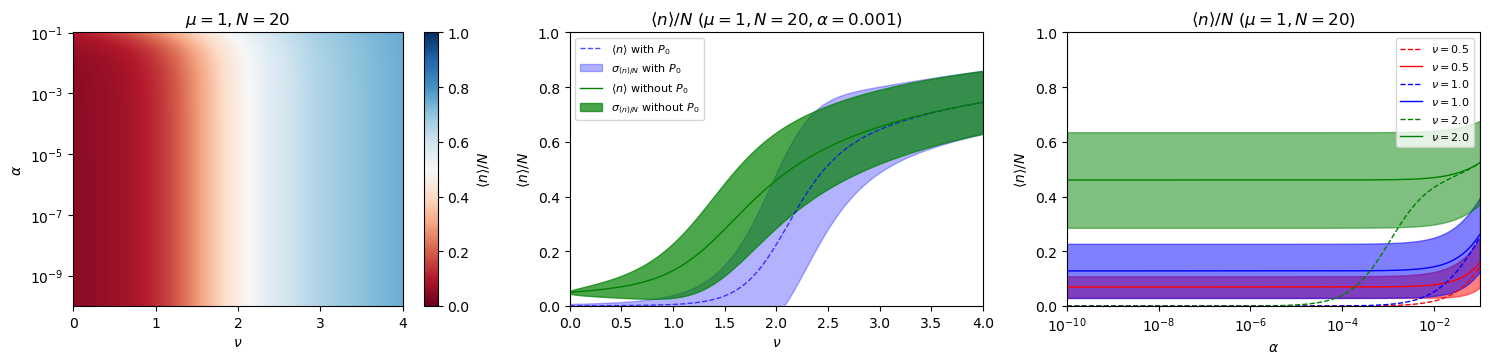

In [80]:
idx_N = get_idx_from_label(N_plot, Ns)
idx_nu_car = get_idx_from_label('nuCars', label_data)

idx_mean_without_P0 = get_idx_from_label('Means', label_data)
idx_std_without_P0 = get_idx_from_label('Std', label_data)

idx_mean_with_P0 = get_idx_from_label('RealMeans', label_data)
idx_std_with_P0 = get_idx_from_label('RealStd', label_data)

alphas = np.logspace(alpha_min, alpha_max, N_alpha)

fig = plt.figure(figsize=(15, 10))

nu_min, nu_max, N_nu = 0, 4, 500
alpha_min, alpha_max, N_alpha = -10, -1, 1000    # alpha = 10**alpha
alphas = np.logspace(alpha_min, alpha_max, N_alpha)

#tres subplots
plt.subplot(331)

plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, total_data_alpha[idx_N][idx_label_plot], cmap="RdBu", vmin=0, vmax=1, shading='auto')
plt.colorbar(label=r"$\langle n \rangle /N$")
plt.yscale("log")
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\alpha$")
plt.title(r"$\mu = 1, N = 20$")


plt.subplot(332)
alphas_cuts = [1e-3]

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

for alpha_cut in alphas_cuts:
    idx = find_nearest(alphas, alpha_cut)
    plt.plot(np.linspace(nu_min, nu_max, N_nu), total_data_alpha[idx_N][idx_mean_with_P0][idx], label=r"$\langle n \rangle$ with $P_0$", color = "blue",alpha = 0.7, lw = 1, linestyle="--")
    plt.fill_between(np.linspace(nu_min, nu_max, N_nu), total_data_alpha[idx_N][idx_mean_with_P0][idx] - total_data_alpha[idx_N][idx_std_with_P0][idx], total_data_alpha[idx_N][idx_mean_with_P0][idx] + total_data_alpha[idx_N][idx_std_with_P0][idx], color="blue", alpha=0.3, label = r"$\sigma_{\langle n \rangle / N}$ with $P_0$")

    plt.plot(np.linspace(nu_min, nu_max, N_nu), total_data_alpha[idx_N][idx_mean_without_P0][idx], label=r"$\langle n \rangle$ without $P_0$", color = "green", lw = 1)
    plt.fill_between(np.linspace(nu_min, nu_max, N_nu), total_data_alpha[idx_N][idx_mean_without_P0][idx] - total_data_alpha[idx_N][idx_std_without_P0][idx], total_data_alpha[idx_N][idx_mean_without_P0][idx] + total_data_alpha[idx_N][idx_std_without_P0][idx], color="green", alpha=0.7, label = r"$\sigma_{\langle n \rangle / N}$ without $P_0$")

    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\langle n \rangle / N$")
    plt.title(r"$\langle n \rangle / N ~(\mu = 1, N = 20, \alpha = $" + str(alpha_cut) + ")")
    plt.legend(fontsize = 8)

    plt.xlim([nu_min, nu_max])
    plt.ylim([0, 1])

plt.subplot(333)

nus = [0.5, 1, 2]
def find_idx_nu(nu, array):
    idx = (np.abs(array - nu)).argmin()
    return idx

colors = ["red", "blue", "green"]

for i, nu in enumerate(nus):
    idx = find_idx_nu(nu, np.linspace(nu_min, nu_max, N_nu))

    plt.plot(alphas, total_data_alpha[idx_N][idx_mean_with_P0][:, idx], label=r"$\nu = %.1f$"%nu, color = colors[i], linestyle="--", lw = 1)

    plt.plot(alphas, total_data_alpha[idx_N][idx_mean_without_P0][:, idx], label=r"$\nu = %.1f$"%nu, color = colors[i], lw = 1)
    plt.fill_between(alphas, total_data_alpha[idx_N][idx_mean_without_P0][:, idx] - total_data_alpha[idx_N][idx_std_without_P0][:, idx], total_data_alpha[idx_N][idx_mean_without_P0][:, idx] + total_data_alpha[idx_N][idx_std_without_P0][:, idx], color=colors[i], alpha=0.5)

    plt.xlabel(r"$\alpha$")
    plt.xscale("log")
    plt.ylabel(r"$\langle n \rangle / N$")
    plt.title(r"$\langle n \rangle / N ~(\mu = 1, N = 20)$")
    plt.legend(fontsize = 8)

    plt.xlim([10**alpha_min, 10**alpha_max])
    plt.ylim([0, 1])

plt.tight_layout()

plt.show()

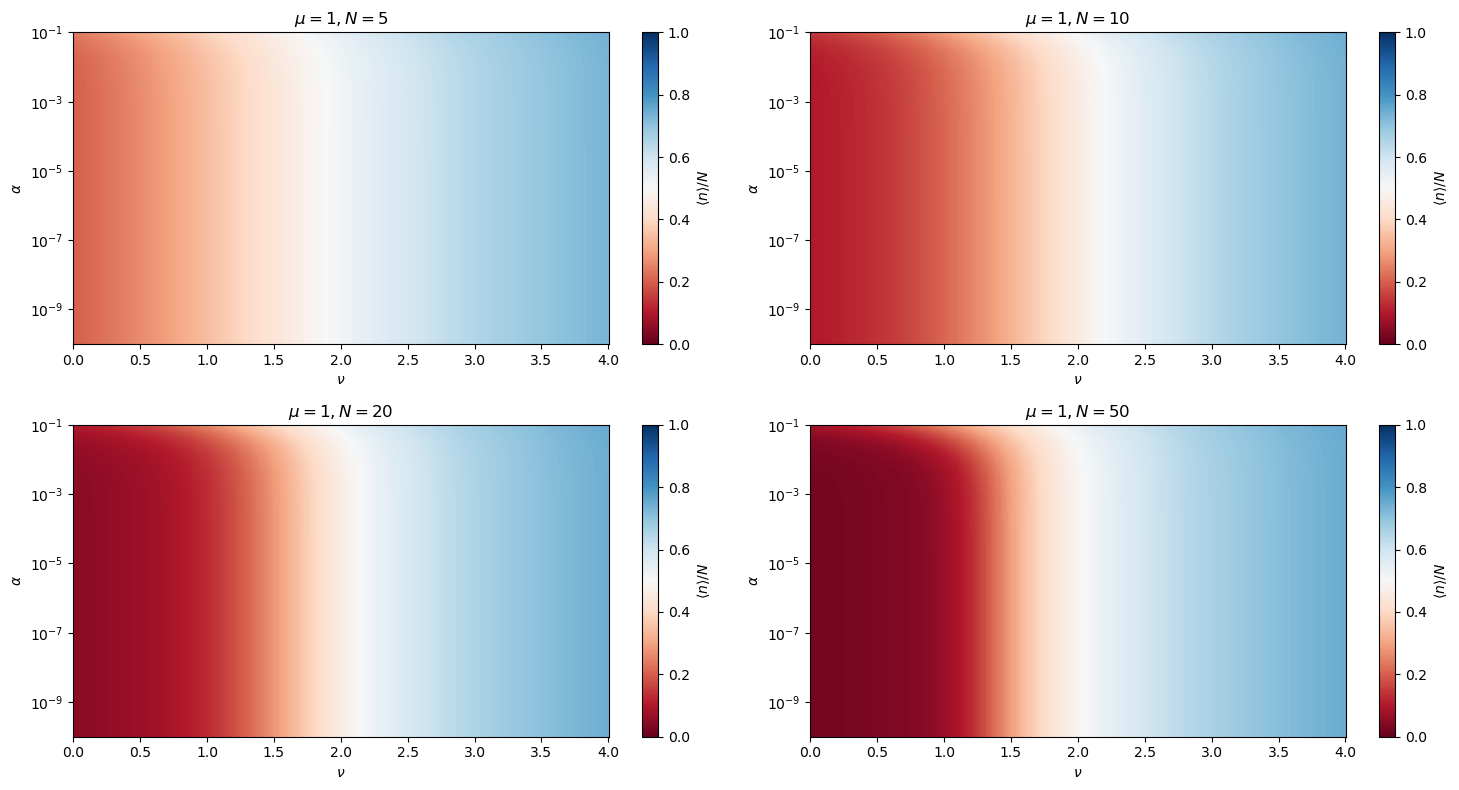

In [81]:
alphas = np.logspace(alpha_min, alpha_max, N_alpha)
fig = plt.figure(figsize=(15, 8))
for i, data in enumerate(total_data_alpha):
    Means = data[get_idx_from_label('Means', label_data)]
    plt.subplot(2, 2, i+1)
    plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, Means, shading="auto", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$\langle n \rangle / N$")
    plt.yscale("log")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha$")
    plt.title(r"$\mu = 1, N = %d$"%Ns[i])

plt.tight_layout()

plt.show()

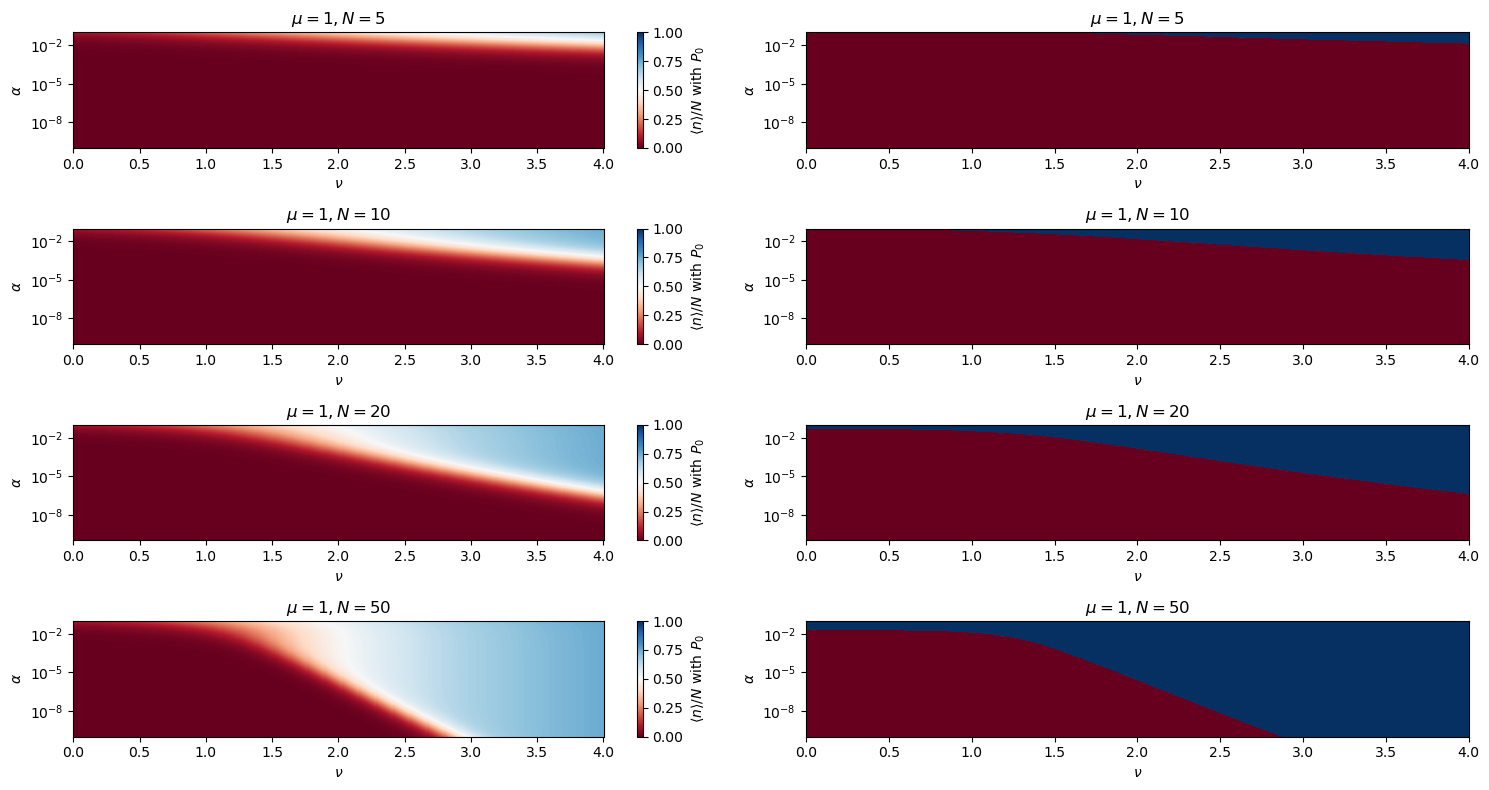

In [85]:
alphas = np.logspace(alpha_min, alpha_max, N_alpha)
fig = plt.figure(figsize=(15, 8))
for i, data in enumerate(total_data_alpha):
    Means = data[get_idx_from_label('RealMeans', label_data)]
    plt.subplot(4, 2, 2*i+1)
    plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, Means, shading="auto", cmap="RdBu", vmin=0, vmax=1)
    plt.colorbar(label=r"$\langle n \rangle / N$ with $P_0$")
    plt.yscale("log")
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha$")
    plt.title(r"$\mu = 1, N = %d$"%Ns[i])

    plt.subplot(4, 2, 2*i+2)
    Std = data[get_idx_from_label('RealStd', label_data)]
    aux = 1-(Means - Std < 0)
    plt.pcolormesh(np.linspace(nu_min, nu_max, N_nu), alphas, aux, shading="auto", cmap="RdBu", vmin=0, vmax=1)

    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha$")
    plt.title(r"$\mu = 1, N = %d$"%Ns[i])
    plt.yscale("log")

plt.tight_layout()

plt.show()